 Explain the oops concept in python with code and why the particular code is used

### 1. Classes and Objects

**Class:** A class is a blueprint or a template for creating objects. It defines a set of attributes (data) and methods (functions) that the objects created from the class will have. Think of it like a cookie cutter; the cookie cutter itself isn't a cookie, but it defines what a cookie will look like and what ingredients it will have.

**Object:** An object is an instance of a class. It's a concrete entity created based on the class blueprint. Each object has its own unique set of attribute values. Using the cookie cutter analogy, the cookies you make are the objects, each with its own shape and ingredients, but all based on the same cutter.

In [ ]:
class Dog:
    # Class attribute (shared by all instances)
    species = "Canis familiaris"

    # Constructor method (initializes object attributes)
    def __init__(self, name, age):
        self.name = name  # Instance attribute
        self.age = age    # Instance attribute

    # Instance method
    def bark(self):
        return f"{self.name} says Woof!"

    # Another instance method
    def description(self):
        return f"{self.name} is {self.age} years old."

# Creating objects (instances) of the Dog class
my_dog = Dog("Buddy", 3)
your_dog = Dog("Lucy", 5)

# Accessing object attributes
print(f"My dog's name: {my_dog.name}")
print(f"Your dog's age: {your_dog.age}")

# Accessing class attribute
print(f"My dog's species: {my_dog.species}")
print(f"Your dog's species: {your_dog.species}")

# Calling instance methods
print(my_dog.bark())
print(your_dog.description())

My dog's name: Buddy
Your dog's age: 5
My dog's species: Canis familiaris
Your dog's species: Canis familiaris
Buddy says Woof!
Lucy is 5 years old.


### 2. Inheritance

**Inheritance:** Inheritance is a mechanism that allows a new class (subclass or derived class) to inherit properties and behaviors (attributes and methods) from an existing class (superclass or base class). This promotes code reusability and establishes a natural hierarchy between classes. Think of it like a child inheriting traits from their parent.

In Python, a class can inherit from one or more classes. When a class inherits from another, it gains all the public and protected members of the parent class, and can also override or extend them. This means you don't have to rewrite common code for related objects.

In [ ]:
class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species

    def show_info(self):
        return f"Name: {self.name}, Species: {self.species}"

    def make_sound(self):
        return "Some generic sound"

# Dog inherits from Animal
class Dog(Animal):
    def __init__(self, name, breed):
        super().__init__(name, species="Dog") # Call the parent's constructor
        self.breed = breed # Add a new attribute specific to Dog

    # Override the make_sound method
    def make_sound(self):
        return f"{self.name} says Woof!"

    # Add a new method specific to Dog
    def fetch(self):
        return f"{self.name} is fetching the ball."

# Cat also inherits from Animal
class Cat(Animal):
    def __init__(self, name, color):
        super().__init__(name, species="Cat")
        self.color = color

    # Override the make_sound method
    def make_sound(self):
        return f"{self.name} says Meow!"

# Creating objects
my_animal = Animal("Generic Pet", "Unknown")
my_dog = Dog("Buddy", "Golden Retriever")
my_cat = Cat("Whiskers", "Tabby")

# Demonstrating inherited and overridden methods
print(my_animal.show_info())
print(my_animal.make_sound())

print(my_dog.show_info()) # Inherited method
print(my_dog.make_sound()) # Overridden method
print(my_dog.fetch()) # New method

print(my_cat.show_info()) # Inherited method
print(my_cat.make_sound()) # Overridden method

Name: Generic Pet, Species: Unknown
Some generic sound
Name: Buddy, Species: Dog
Buddy says Woof!
Buddy is fetching the ball.
Name: Whiskers, Species: Cat
Whiskers says Meow!


### 3. Encapsulation

**Encapsulation:** Encapsulation is the bundling of data (attributes) and methods (functions) that operate on the data into a single unit, which is an object. It also involves restricting direct access to some of an object's components, meaning that the internal state of an object is hidden from the outside world.

In Python, encapsulation is achieved using access modifiers, though they are more a convention than strict enforcement:
*   **Public members:** Accessible from anywhere. By default, all members in Python are public.
*   **Protected members:** Indicated by a single underscore prefix (e.g., `_attribute`). This is a convention to suggest that the member should not be accessed directly from outside the class or its subclasses, but it's not enforced by the language.
*   **Private members:** Indicated by a double underscore prefix (e.g., `__attribute`). This causes Python to 'mangle' the name, making it harder (but not impossible) to access from outside the class. This provides a stronger form of encapsulation.

In [ ]:
class BankAccount:
    def __init__(self, account_holder, initial_balance):
        self.account_holder = account_holder # Public attribute
        self.__balance = initial_balance     # Private attribute (name mangled)
        self._account_number = "123456789" # Protected attribute (convention)

    def deposit(self, amount):
        if amount > 0:
            self.__balance += amount
            print(f"Deposited ${amount}. New balance: ${self.__balance}")
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount):
        if 0 < amount <= self.__balance:
            self.__balance -= amount
            print(f"Withdrew ${amount}. New balance: ${self.__balance}")
        else:
            print("Invalid withdrawal amount or insufficient funds.")

    def get_balance(self): # Public method to access private attribute
        return self.__balance

    def _get_account_number(self): # Protected method to access protected attribute
        return self._account_number


# Creating an object
account = BankAccount("Alice Smith", 1000)

# Accessing public attribute
print(f"Account holder: {account.account_holder}")

# Attempting to directly access private attribute (will not work as expected)
# print(f"Directly accessing balance: {account.__balance}") # This would raise an AttributeError

# Accessing private attribute through a public method (getter)
print(f"Current balance: ${account.get_balance()}")

# Performing operations using public methods
account.deposit(500)
account.withdraw(200)
account.withdraw(2000) # Invalid withdrawal

# Accessing protected attribute (by convention, should not be done directly outside)
print(f"Account number (protected): {account._account_number}")

# Accessing name-mangled private attribute (demonstration, generally avoid)
# print(f"Name-mangled balance: {account._BankAccount__balance}") # This works, showing it's not truly private


Account holder: Alice Smith
Current balance: $1000
Deposited $500. New balance: $1500
Withdrew $200. New balance: $1300
Invalid withdrawal amount or insufficient funds.
Account number (protected): 123456789


### 4. Polymorphism

**Polymorphism** means "many forms." In the context of Object-Oriented Programming, it refers to the ability of different objects to respond to the same method call in their own unique ways. This allows for writing flexible and reusable code, as you can treat objects of different classes uniformly as long as they implement a common method.

In Python, polymorphism is largely achieved through:

1.  **Method Overriding (Runtime Polymorphism):** A subclass provides a specific implementation for a method that is already defined in its superclass. When that method is called on an object, the method of the actual object type is executed, not necessarily the method of the reference type.

2.  **Duck Typing:** Python heavily relies on "duck typing" for polymorphism. The principle is: "If it walks like a duck and quacks like a duck, then it is a duck." This means an object's suitability for a task is determined by the presence of certain methods and attributes, rather than by its explicit type or its inheritance from a particular class. If an object has the method you are trying to call, Python will call it, regardless of the object's class.

Python does not support traditional **Method Overloading** (multiple methods with the same name but different parameter lists) like some other languages. However, similar functionality can be achieved using default arguments or variable-length argument lists in a single method.

In [ ]:
class Vehicle:
    def __init__(self, name):
        self.name = name

    def drive(self):
        # Generic drive method
        return f"{self.name} is driving."

class Car(Vehicle):
    def __init__(self, name, make):
        super().__init__(name)
        self.make = make

    def drive(self):
        # Specific drive method for a Car
        return f"The {self.make} {self.name} is zooming on the road."

class Bicycle(Vehicle):
    def __init__(self, name, type_bike):
        super().__init__(name)
        self.type_bike = type_bike

    def drive(self):
        # Specific drive method for a Bicycle
        return f"The {self.type_bike} {self.name} is being pedaled along a path."

# A function that can take any object that has a 'drive' method
def make_it_drive(vehicle):
    return vehicle.drive()

# Creating objects of different classes
vehicle_obj = Vehicle("Generic Vehicle")
car_obj = Car("Model S", "Tesla")
bicycle_obj = Bicycle("Mountain Bike", "Trek")

print("--- Demonstrating Polymorphism with Method Overriding ---")
print(make_it_drive(vehicle_obj))
print(make_it_drive(car_obj))
print(make_it_drive(bicycle_obj))

print("\n--- Demonstrating Polymorphism with a list of vehicles (Duck Typing) ---")
vehicles_list = [
    Car("Civic", "Honda"),
    Bicycle("Roadster", "Schwinn"),
    Vehicle("Unknown Transport")
]

for v in vehicles_list:
    print(v.drive()) # Each object calls its own 'drive' method

--- Demonstrating Polymorphism with Method Overriding ---
Generic Vehicle is driving.
The Tesla Model S is zooming on the road.
The Trek Mountain Bike is being pedaled along a path.

--- Demonstrating Polymorphism with a list of vehicles (Duck Typing) ---
The Honda Civic is zooming on the road.
The Schwinn Roadster is being pedaled along a path.
Unknown Transport is driving.


### 5. Abstraction

**Abstraction** is the process of hiding the complex implementation details and showing only the essential features of an object. It focuses on *what* an object does rather than *how* it does it. Abstraction helps in managing complexity by providing a simplified view of the system.

In Python, abstraction can be achieved using:

1.  **Abstract Base Classes (ABCs):** Python's `abc` module allows you to define abstract classes and abstract methods. An abstract class cannot be instantiated directly, and abstract methods must be implemented by concrete (non-abstract) subclasses.
2.  **Using regular classes with convention:** You can also achieve a form of abstraction by defining methods that are meant to be overridden by subclasses, even without explicitly using ABCs. However, ABCs provide a stronger guarantee that abstract methods *will* be implemented.

Abstract classes are particularly useful when you want to define a common interface for a group of related classes, but you don't want to provide a default implementation for certain methods in the base class. These methods must be implemented by any concrete subclass.

In [ ]:
from abc import ABC, abstractmethod

# Define an Abstract Base Class
class Shape(ABC):
    def __init__(self, name):
        self.name = name

    # Abstract method: must be implemented by subclasses
    @abstractmethod
    def area(self):
        pass

    # Abstract method: must be implemented by subclasses
    @abstractmethod
    def perimeter(self):
        pass

    def get_name(self):
        return self.name

# Concrete subclass: Circle
class Circle(Shape):
    def __init__(self, name, radius):
        super().__init__(name)
        self.radius = radius

    def area(self):
        return 3.14159 * self.radius ** 2

    def perimeter(self):
        return 2 * 3.14159 * self.radius

# Concrete subclass: Rectangle
class Rectangle(Shape):
    def __init__(self, name, length, width):
        super().__init__(name)
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * (self.length + self.width)

# --- Demonstrating Abstraction ---

# Cannot instantiate an abstract class directly
try:
    # generic_shape = Shape("Generic") # This would raise a TypeError
    print("Cannot instantiate abstract class Shape directly.")
except TypeError as e:
    print(f"Error: {e}")

# Create instances of concrete subclasses
circle = Circle("My Circle", 5)
rectangle = Rectangle("My Rectangle", 4, 6)

# Accessing methods through the abstract interface
print(f"\n{circle.get_name()}:")
print(f"  Area: {circle.area()}")
print(f"  Perimeter: {circle.perimeter()}")

print(f"\n{rectangle.get_name()}:")
print(f"  Area: {rectangle.area()}")
print(f"  Perimeter: {rectangle.perimeter()}")

# Polymorphic behavior with an abstract base class
shapes = [Circle("Small Circle", 2), Rectangle("Long Rectangle", 10, 1)]

print("\n--- Processing shapes polymorphically ---")
for s in shapes:
    print(f"  {s.get_name()} (Area: {s.area()}, Perimeter: {s.perimeter()})")


Cannot instantiate abstract class Shape directly.

My Circle:
  Area: 78.53975
  Perimeter: 31.4159

My Rectangle:
  Area: 24
  Perimeter: 20

--- Processing shapes polymorphically ---
  Small Circle (Area: 12.56636, Perimeter: 12.56636)
  Long Rectangle (Area: 10, Perimeter: 22)


### 1. Numeric Types: `int` and `float`

In Python, numeric data types are used to store numerical values. The two primary built-in numeric types are `int` for integers and `float` for floating-point numbers.

**`int` (Integers):**
*   Integers are whole numbers, positive or negative, without a decimal point.
*   They can be of arbitrary precision, meaning Python can handle extremely large integers, limited only by the available memory.
*   Examples: `5`, `-100`, `0`, `12345678901234567890`.

**`float` (Floating-Point Numbers):**
*   Floating-point numbers represent real numbers and are written with a decimal point or using scientific notation.
*   They have limited precision (typically double-precision 64-bit), which means they can represent very large or very small numbers, but with a finite number of significant digits. This can sometimes lead to small precision errors in calculations.
*   Examples: `3.14`, `-0.5`, `2.0`, `1.23e-5` (which is 1.23 × 10^-5).

Python automatically handles the type conversion between `int` and `float` in many arithmetic operations, often promoting integers to floats when necessary to maintain precision.

In [ ]:
# --- Demonstrating Integers (`int`) ---
int_positive = 10
int_negative = -5
int_zero = 0
int_large = 123456789012345678901234567890

print(f"Integer Examples:")
print(f"  Positive: {int_positive}, type: {type(int_positive)}")
print(f"  Negative: {int_negative}, type: {type(int_negative)}")
print(f"  Zero: {int_zero}, type: {type(int_zero)}")
print(f"  Large: {int_large}, type: {type(int_large)}")

# Integer arithmetic
sum_int = int_positive + int_negative
product_int = int_positive * 2
division_int = 7 // 3 # Integer division
print(f"  Sum: {sum_int}, Product: {product_int}, Integer Division (7 // 3): {division_int}")

# --- Demonstrating Floating-Point Numbers (`float`) ---
float_decimal = 3.14159
float_negative = -0.001
float_scientific = 1.5e-3 # 0.0015
float_from_int = float(int_positive) # Explicit conversion

print(f"\nFloating-Point Examples:")
print(f"  Decimal: {float_decimal}, type: {type(float_decimal)}")
print(f"  Negative: {float_negative}, type: {type(float_negative)}")
print(f"  Scientific: {float_scientific}, type: {type(float_scientific)}")
print(f"  From int: {float_from_int}, type: {type(float_from_int)}")

# Float arithmetic
sum_float = float_decimal + 2.5
product_float = float_negative * 10.0
division_float = 7 / 3 # Float division
print(f"  Sum: {sum_float}, Product: {product_float}, Float Division (7 / 3): {division_float}")

# Mixed type arithmetic (int and float)
mixed_sum = int_positive + float_decimal
mixed_product = int_large * float_negative
print(f"\nMixed Type Arithmetic:")
print(f"  int + float: {mixed_sum}, type: {type(mixed_sum)}")
print(f"  large_int * float: {mixed_product}, type: {type(mixed_product)}")

# Understanding float precision
print(f"\nFloating-Point Precision Example:")
print(f"  0.1 + 0.2: {0.1 + 0.2}") # Often not exactly 0.3 due to binary representation

Integer Examples:
  Positive: 10, type: <class 'int'>
  Negative: -5, type: <class 'int'>
  Zero: 0, type: <class 'int'>
  Large: 123456789012345678901234567890, type: <class 'int'>
  Sum: 5, Product: 20, Integer Division (7 // 3): 2

Floating-Point Examples:
  Decimal: 3.14159, type: <class 'float'>
  Negative: -0.001, type: <class 'float'>
  Scientific: 0.0015, type: <class 'float'>
  From int: 10.0, type: <class 'float'>
  Sum: 5.64159, Product: -0.01, Float Division (7 / 3): 2.3333333333333335

Mixed Type Arithmetic:
  int + float: 13.14159, type: <class 'float'>
  large_int * float: -1.2345678901234568e+26, type: <class 'float'>

Floating-Point Precision Example:
  0.1 + 0.2: 0.30000000000000004


### 2. String Type: `str`

In Python, the `str` type is used to represent sequences of Unicode characters. Strings are immutable, meaning once a string is created, its content cannot be changed. Any operation that appears to modify a string actually creates a new string.

**Key Characteristics:**

*   **Sequence of Characters:** Strings are ordered collections of characters.
*   **Immutable:** You cannot change individual characters within a string after it's created. Operations like concatenation or slicing return new strings.
*   **Defined with Quotes:** Strings can be defined using single quotes (`'...'`), double quotes (`"..."`), or triple quotes (`'''...'''` or `"""..."""`) for multi-line strings.
*   **Unicode Support:** Python 3 strings natively support Unicode, allowing them to represent text from virtually any language.
*   **Rich Set of Methods:** Python strings come with many built-in methods for manipulation, searching, formatting, and more.

In [ ]:
# --- Creating Strings ---
single_quoted = 'Hello, Python!'
double_quoted = "This is a string."
multi_line = """This is a
multi-line
string."""
escaped_chars = 'He said, "Hello!"'

print(f"Single quoted: {single_quoted}, type: {type(single_quoted)}")
print(f"Double quoted: {double_quoted}")
print(f"Multi-line:\n{multi_line}")
print(f"Escaped characters: {escaped_chars}")

# --- String Length ---
print(f"\nLength of single_quoted: {len(single_quoted)}")

# --- String Concatenation ---
string1 = "Hello"
string2 = "World"
combined_string = string1 + " " + string2 + "!"
print(f"\nConcatenated string: {combined_string}")

# --- String Repetition ---
repeated_string = "abc" * 3
print(f"Repeated string: {repeated_string}")

# --- String Indexing and Slicing ---
my_string = "Python Programming"
print(f"\nFirst character: {my_string[0]}")
print(f"Last character: {my_string[-1]}")
print(f"Slice (2nd to 6th char): {my_string[1:6]}") # 'ython'
print(f"Slice (from beginning to 7th char): {my_string[:7]}") # 'Python '
print(f"Slice (from 8th char to end): {my_string[8:]}") # 'Programming'
print(f"Slice with step (every other char): {my_string[::2]}") # 'Pto rgamn'

# --- String Methods (Examples) ---
text = "  Python is FUN!  "

print(f"\nOriginal text: '{text}'")
print(f"Uppercase: '{text.upper()}'")
print(f"Lowercase: '{text.lower()}'")
print(f"Title case: '{text.title()}'")
print(f"Stripped (whitespace removed): '{text.strip()}'")
print(f"Replaced 'FUN' with 'awesome': '{text.replace('FUN', 'awesome')}'")
print(f"Starts with '  Python': {text.startswith('  Python')}")
print(f"Ends with 'FUN!  ': {text.endswith('FUN!  ')}")
print(f"Find 'is': {text.find('is')}") # Returns index of first occurrence

# --- String Formatting ---
name = "Alice"
age = 30

# f-strings (formatted string literals - recommended)
formatted_fstring = f"Name: {name}, Age: {age}"
print(f"\nf-string: {formatted_fstring}")

# .format() method
formatted_format = "Name: {}, Age: {}".format(name, age)
print(f".format(): {formatted_format}")

# Old-style % formatting
formatted_percent = "Name: %s, Age: %d" % (name, age)
print(f"% formatting: {formatted_percent}")

# --- Immutability Example (Attempting to change a character) ---
try:
    immutable_str = "hello"
    # immutable_str[0] = 'J' # This would raise a TypeError
    print(f"\nAttempting to modify a string (e.g., immutable_str[0] = 'J') would result in an error.")
    print(f"Original string is still: {immutable_str}")
except TypeError as e:
    print(f"\nError demonstrating immutability: {e}")


Single quoted: Hello, Python!, type: <class 'str'>
Double quoted: This is a string.
Multi-line:
This is a
multi-line
string.
Escaped characters: He said, "Hello!"

Length of single_quoted: 14

Concatenated string: Hello World!
Repeated string: abcabcabc

First character: P
Last character: g
Slice (2nd to 6th char): ython
Slice (from beginning to 7th char): Python 
Slice (from 8th char to end): rogramming
Slice with step (every other char): Pto rgamn

Original text: '  Python is FUN!  '
Uppercase: '  PYTHON IS FUN!  '
Lowercase: '  python is fun!  '
Title case: '  Python Is Fun!  '
Stripped (whitespace removed): 'Python is FUN!'
Replaced 'FUN' with 'awesome': '  Python is awesome!  '
Starts with '  Python': True
Ends with 'FUN!  ': True
Find 'is': 9

f-string: Name: Alice, Age: 30
.format(): Name: Alice, Age: 30
% formatting: Name: Alice, Age: 30

Attempting to modify a string (e.g., immutable_str[0] = 'J') would result in an error.
Original string is still: hello


### 3. Collection Types: `list`, `tuple`, `dict`, and `set`

Python offers several built-in collection types to store multiple items. Each has distinct characteristics and use cases.

**`list`:**
*   An ordered, mutable (changeable) sequence of items.
*   Items can be of different data types.
*   Defined using square brackets `[]`.
*   Supports indexing, slicing, and various methods for adding, removing, or modifying elements.

**`tuple`:**
*   An ordered, immutable (unchangeable) sequence of items.
*   Similar to lists, but once created, its elements cannot be modified.
*   Defined using parentheses `()`.
*   Often used for collections of heterogeneous data that should not be modified, or as keys in dictionaries (since they are immutable).

**`dict` (Dictionary):**
*   An unordered, mutable collection of *key-value pairs*.
*   Keys must be unique and immutable (e.g., strings, numbers, tuples).
*   Values can be of any data type and can be duplicated.
*   Defined using curly braces `{}` with `key: value` pairs.
*   Optimized for retrieving values when the key is known.

**`set`:**
*   An unordered, mutable collection of *unique* items.
*   Does not allow duplicate elements.
*   Defined using curly braces `{}` (but without key-value pairs) or the `set()` constructor.
*   Useful for membership testing, removing duplicates, and performing mathematical set operations (union, intersection, difference).

### 4. Boolean Type: `bool`

**`bool`:**
*   Represents truth values: `True` or `False`.
*   Fundamental for logical operations, conditional statements (`if/else`), and loops.
*   Internally, `True` evaluates to `1` and `False` to `0` in numeric contexts.
*   Many operations and functions in Python return boolean values (e.g., comparison operators, `isinstance()`).

In [ ]:
# --- Demonstrating Lists (`list`) ---
my_list = [1, "hello", 3.14, True]
print(f"\nList: {my_list}, type: {type(my_list)}")
print(f"  First element: {my_list[0]}")
my_list.append("world") # Add an element
print(f"  List after append: {my_list}")
my_list[1] = "python" # Modify an element
print(f"  List after modification: {my_list}")

# --- Demonstrating Tuples (`tuple`) ---
my_tuple = (10, "apple", False)
print(f"\nTuple: {my_tuple}, type: {type(my_tuple)}")
print(f"  Second element: {my_tuple[1]}")
# my_tuple[0] = 20 # This would raise a TypeError (tuples are immutable)
print("  Attempting to modify a tuple element would raise a TypeError.")

# --- Demonstrating Dictionaries (`dict`) ---
my_dict = {"name": "Alice", "age": 30, "city": "New York"}
print(f"\nDictionary: {my_dict}, type: {type(my_dict)}")
print(f"  Alice's age: {my_dict['age']}")
my_dict["age"] = 31 # Modify value
my_dict["occupation"] = "Engineer" # Add new key-value pair
print(f"  Dictionary after modification: {my_dict}")
print(f"  All keys: {my_dict.keys()}")
print(f"  All values: {my_dict.values()}")

# --- Demonstrating Sets (`set`) ---
my_set = {1, 2, 3, 2, 4}
print(f"\nSet: {my_set}, type: {type(my_set)}") # Duplicates are removed automatically
my_set.add(5) # Add an element
print(f"  Set after adding 5: {my_set}")
my_set.remove(1) # Remove an element
print(f"  Set after removing 1: {my_set}")
print(f"  Is 3 in set? {3 in my_set}")
another_set = {3, 4, 6}
print(f"  Union of sets: {my_set.union(another_set)}")
print(f"  Intersection of sets: {my_set.intersection(another_set)}")

# --- Demonstrating Booleans (`bool`) ---
is_sunny = True
is_raining = False
print(f"\nBoolean Examples:")
print(f"  Is it sunny? {is_sunny}, type: {type(is_sunny)}")
print(f"  Is it raining? {is_raining}, type: {type(is_raining)}")

# Logical operations
print(f"  Is it sunny AND not raining? {is_sunny and not is_raining}")
print(f"  Is it sunny OR raining? {is_sunny or is_raining}")

# Boolean conversion
print(f"  bool(0): {bool(0)}")
print(f"  bool(1): {bool(1)}")
print(f"  bool(\'\'): {bool('')}")
print(f"  bool(\'hello\'): {bool('hello')}")
print(f"  bool([]): {bool([])}")
print(f"  bool([1, 2]): {bool([1, 2])}")


List: [1, 'hello', 3.14, True], type: <class 'list'>
  First element: 1
  List after append: [1, 'hello', 3.14, True, 'world']
  List after modification: [1, 'python', 3.14, True, 'world']

Tuple: (10, 'apple', False), type: <class 'tuple'>
  Second element: apple
  Attempting to modify a tuple element would raise a TypeError.

Dictionary: {'name': 'Alice', 'age': 30, 'city': 'New York'}, type: <class 'dict'>
  Alice's age: 30
  Dictionary after modification: {'name': 'Alice', 'age': 31, 'city': 'New York', 'occupation': 'Engineer'}
  All keys: dict_keys(['name', 'age', 'city', 'occupation'])
  All values: dict_values(['Alice', 31, 'New York', 'Engineer'])

Set: {1, 2, 3, 4}, type: <class 'set'>
  Set after adding 5: {1, 2, 3, 4, 5}
  Set after removing 1: {2, 3, 4, 5}
  Is 3 in set? True
  Union of sets: {2, 3, 4, 5, 6}
  Intersection of sets: {3, 4}

Boolean Examples:
  Is it sunny? True, type: <class 'bool'>
  Is it raining? False, type: <class 'bool'>
  Is it sunny AND not raining

Python Libraries for Data Science


### 1. NumPy (Numerical Python)

**NumPy** (Numerical Python) is a foundational library for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays efficiently. It is a cornerstone of the data science ecosystem in Python, upon which many other libraries (like Pandas) are built.

**Key Features and Importance:**

*   **`ndarray` (N-dimensional Array Object):** The core of NumPy is its `ndarray` object, which is a fast and memory-efficient array that can handle multi-dimensional data. Unlike Python lists, all elements in a NumPy array must be of the same data type.
*   **Vectorized Operations:** NumPy allows you to perform operations on entire arrays without writing explicit loops (vectorization). This makes computations much faster and the code more concise.
*   **Broadcasting:** This powerful feature allows NumPy to work with arrays of different shapes when performing arithmetic operations. Subject to certain constraints, the smaller array is "broadcast" across the larger array so that they have compatible shapes.
*   **Mathematical Functions:** NumPy provides a vast collection of mathematical functions for linear algebra, Fourier transforms, random number generation, etc.
*   **Integration:** It integrates well with other data science libraries like Pandas, SciPy, Matplotlib, and scikit-learn.

In [ ]:
import numpy as np

# --- Creating NumPy Arrays ---

# From a Python list
list_data = [1, 2, 3, 4, 5]
array_1d = np.array(list_data)
print(f"1D Array: {array_1d}, Type: {type(array_1d)}")
print(f"Shape: {array_1d.shape}, Data Type: {array_1d.dtype}")

# 2D Array (Matrix)
list_of_lists = [[1, 2, 3], [4, 5, 6]]
array_2d = np.array(list_of_lists)
print(f"\n2D Array:\n{array_2d}, Type: {type(array_2d)}")
print(f"Shape: {array_2d.shape}, Dimensions: {array_2d.ndim}")

# Using built-in NumPy functions
zeros_array = np.zeros((2, 3)) # 2x3 array of zeros
ones_array = np.ones((1, 4))   # 1x4 array of ones
range_array = np.arange(0, 10, 2) # Array with values from 0 up to 10 (exclusive), step 2
linspace_array = np.linspace(0, 1, 5) # 5 evenly spaced numbers between 0 and 1
identity_matrix = np.eye(3) # 3x3 Identity matrix

print(f"\nZeros Array:\n{zeros_array}")
print(f"Ones Array: {ones_array}")
print(f"Range Array: {range_array}")
print(f"Linspace Array: {linspace_array}")
print(f"Identity Matrix:\n{identity_matrix}")

# --- Array Operations (Vectorization) ---
arr1 = np.array([10, 20, 30, 40])
arr2 = np.array([1, 2, 3, 4])

print(f"\nArray 1: {arr1}")
print(f"Array 2: {arr2}")

print(f"Addition (arr1 + arr2): {arr1 + arr2}")
print(f"Multiplication (arr1 * arr2): {arr1 * arr2}")
print(f"Scalar Multiplication (arr1 * 2): {arr1 * 2}")
print(f"Square root (np.sqrt(arr1)): {np.sqrt(arr1)}")
print(f"Sum of arr1: {np.sum(arr1)}")
print(f"Mean of arr1: {np.mean(arr1)}")

# --- Indexing and Slicing ---
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"\nMatrix:\n{matrix}")
print(f"Element at (0, 0): {matrix[0, 0]}") # First row, first column
print(f"Second row: {matrix[1, :]}") # Entire second row
print(f"First column: {matrix[:, 0]}") # Entire first column
print(f"Sub-matrix (top-right 2x2):\n{matrix[:2, 1:]}")

# Conditional indexing
print(f"Elements greater than 5: {matrix[matrix > 5]}")

# --- Broadcasting ---
arr_a = np.array([[1, 2, 3], [4, 5, 6]]) # Shape (2, 3)
arr_b = np.array([10, 20, 30])         # Shape (3,)

print(f"\nArray A:\n{arr_a}")
print(f"Array B: {arr_b}")
print(f"A + B (Broadcasting):\n{arr_a + arr_b}")

1D Array: [1 2 3 4 5], Type: <class 'numpy.ndarray'>
Shape: (5,), Data Type: int64

2D Array:
[[1 2 3]
 [4 5 6]], Type: <class 'numpy.ndarray'>
Shape: (2, 3), Dimensions: 2

Zeros Array:
[[0. 0. 0.]
 [0. 0. 0.]]
Ones Array: [[1. 1. 1. 1.]]
Range Array: [0 2 4 6 8]
Linspace Array: [0.   0.25 0.5  0.75 1.  ]
Identity Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Array 1: [10 20 30 40]
Array 2: [1 2 3 4]
Addition (arr1 + arr2): [11 22 33 44]
Multiplication (arr1 * arr2): [ 10  40  90 160]
Scalar Multiplication (arr1 * 2): [20 40 60 80]
Square root (np.sqrt(arr1)): [3.16227766 4.47213595 5.47722558 6.32455532]
Sum of arr1: 100
Mean of arr1: 25.0

Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Element at (0, 0): 1
Second row: [4 5 6]
First column: [1 4 7]
Sub-matrix (top-right 2x2):
[[2 3]
 [5 6]]
Elements greater than 5: [6 7 8 9]

Array A:
[[1 2 3]
 [4 5 6]]
Array B: [10 20 30]
A + B (Broadcasting):
[[11 22 33]
 [14 25 36]]


### 2.1 Pandas (Python Data Analysis Library)

**Pandas** is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool, built on top of the Python programming language. It is particularly well-suited for working with tabular data (like spreadsheets or SQL tables) and time series data.

**Key Features and Importance:**

*   **DataFrame Object:** The primary data structure in Pandas, a `DataFrame`, is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it as a spreadsheet or a SQL table, and it is the most commonly used Pandas object.
*   **Series Object:** A `Series` is a one-dimensional labeled array capable of holding any data type. It can be seen as a single column or row of a DataFrame.
*   **Data Manipulation:** Pandas provides powerful tools for reading (e.g., CSV, Excel), writing, selecting, filtering, grouping, merging, and reshaping data.
*   **Missing Data Handling:** Robust functionalities to easily handle missing data (e.g., `NaN` values).
*   **Data Cleaning:** Tools for data cleaning, such as removing duplicates, re-indexing, and handling messy data.
*   **Integration:** Designed to work well with other libraries in the scientific Python ecosystem, especially NumPy for numerical operations and Matplotlib/Seaborn for visualization.

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Creating a DataFrame ---
print("--- Creating a DataFrame ---")
data = {
    'Student_ID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Major': ['Computer Science', 'Physics', 'Biology', 'Computer Science', 'Chemistry'],
    'Grade': [88, 92, 75, 95, 80],
    'Age': [20, 21, 19, 22, np.nan] # np.nan represents a missing value
}
df_students = pd.DataFrame(data)
print("Original DataFrame (df_students):")
display(df_students)

# --- 2. Basic Data Inspection ---
print("\n--- Basic Data Inspection ---")
print("DataFrame Info (df_students.info()):")
df_students.info()
print("\nDataFrame Description (df_students.describe() - for numerical columns):")
display(df_students.describe())
print("\nChecking for missing values (df_students.isnull().sum()):")
display(df_students.isnull().sum())

# --- 3. Selecting Data ---
print("\n--- Selecting Data ---")
print("Select 'Name' column (returns a Series):")
display(df_students['Name'])
print("\nSelect 'Name' and 'Major' columns (returns a DataFrame):")
display(df_students[['Name', 'Major']])
print("\nSelect first 3 rows (df_students.head(3)):")
display(df_students.head(3))

# --- 4. Filtering Data ---
print("\n--- Filtering Data ---")
print("Students with Grade > 85:")
display(df_students[df_students['Grade'] > 85])
print("\nComputer Science Majors:")
display(df_students[df_students['Major'] == 'Computer Science'])
print("\nStudents with Grade > 80 AND are not missing Age:")
display(df_students[(df_students['Grade'] > 80) & (df_students['Age'].notnull())])

# --- 5. Handling Missing Data ---
print("\n--- Handling Missing Data ---")
print("DataFrame after filling missing 'Age' with its mean:")
df_filled_age = df_students.fillna({'Age': df_students['Age'].mean()})
display(df_filled_age)
print("DataFrame after dropping rows with any missing values:")
df_dropped_na = df_students.dropna()
display(df_dropped_na)

# --- 6. Adding/Modifying Columns ---
print("\n--- Adding/Modifying Columns ---")
df_students['Passed'] = df_students['Grade'] > 70
print("DataFrame with new 'Passed' column:")
display(df_students)

df_students['Grade_Category'] = df_students['Grade'].apply(lambda x: 'Excellent' if x >= 90 else 'Good' if x >= 80 else 'Pass' if x >= 70 else 'Fail')
print("DataFrame with new 'Grade_Category' column:")
display(df_students)

# --- 7. Grouping and Aggregating Data ---
print("\n--- Grouping and Aggregating Data ---")
print("Average Grade and Age by Major:")
display(df_students.groupby('Major').agg(Average_Grade=('Grade', 'mean'), Average_Age=('Age', 'mean')))

# --- 8. Sorting Data ---
print("\n--- Sorting Data by Grade (descending):---")
display(df_students.sort_values(by='Grade', ascending=False))


--- Creating a DataFrame ---
Original DataFrame (df_students):


,Student_ID,Name,Major,Grade,Age
0,101,Alice,Computer Science,88,20.0
1,102,Bob,Physics,92,21.0
2,103,Charlie,Biology,75,19.0
3,104,David,Computer Science,95,22.0
4,105,Eve,Chemistry,80,NaN



--- Basic Data Inspection ---
DataFrame Info (df_students.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  5 non-null      int64  
 1   Name        5 non-null      object 
 2   Major       5 non-null      object 
 3   Grade       5 non-null      int64  
 4   Age         4 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes

DataFrame Description (df_students.describe() - for numerical columns):


,Student_ID,Grade,Age
count,5.000000,5.000000,4.000000
mean,103.000000,86.000000,20.500000
std,1.581139,8.336666,1.290994
min,101.000000,75.000000,19.000000
25%,102.000000,80.000000,19.750000
50%,103.000000,88.000000,20.500000
75%,104.000000,92.000000,21.250000
max,105.000000,95.000000,22.000000



Checking for missing values (df_students.isnull().sum()):


,0
Student_ID,0
Name,0
Major,0
Grade,0
Age,1



--- Selecting Data ---
Select 'Name' column (returns a Series):


,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Eve



Select 'Name' and 'Major' columns (returns a DataFrame):


,Name,Major
0,Alice,Computer Science
1,Bob,Physics
2,Charlie,Biology
3,David,Computer Science
4,Eve,Chemistry



Select first 3 rows (df_students.head(3)):


,Student_ID,Name,Major,Grade,Age
0,101,Alice,Computer Science,88,20.0
1,102,Bob,Physics,92,21.0
2,103,Charlie,Biology,75,19.0



--- Filtering Data ---
Students with Grade > 85:


,Student_ID,Name,Major,Grade,Age
0,101,Alice,Computer Science,88,20.0
1,102,Bob,Physics,92,21.0
3,104,David,Computer Science,95,22.0



Computer Science Majors:


,Student_ID,Name,Major,Grade,Age
0,101,Alice,Computer Science,88,20.0
3,104,David,Computer Science,95,22.0



Students with Grade > 80 AND are not missing Age:


,Student_ID,Name,Major,Grade,Age
0,101,Alice,Computer Science,88,20.0
1,102,Bob,Physics,92,21.0
3,104,David,Computer Science,95,22.0



--- Handling Missing Data ---
DataFrame after filling missing 'Age' with its mean:


,Student_ID,Name,Major,Grade,Age
0,101,Alice,Computer Science,88,20.0
1,102,Bob,Physics,92,21.0
2,103,Charlie,Biology,75,19.0
3,104,David,Computer Science,95,22.0
4,105,Eve,Chemistry,80,20.5


DataFrame after dropping rows with any missing values:


,Student_ID,Name,Major,Grade,Age
0,101,Alice,Computer Science,88,20.0
1,102,Bob,Physics,92,21.0
2,103,Charlie,Biology,75,19.0
3,104,David,Computer Science,95,22.0



--- Adding/Modifying Columns ---
DataFrame with new 'Passed' column:


,Student_ID,Name,Major,Grade,Age,Passed
0,101,Alice,Computer Science,88,20.0,True
1,102,Bob,Physics,92,21.0,True
2,103,Charlie,Biology,75,19.0,True
3,104,David,Computer Science,95,22.0,True
4,105,Eve,Chemistry,80,NaN,True


DataFrame with new 'Grade_Category' column:


,Student_ID,Name,Major,Grade,Age,Passed,Grade_Category
0,101,Alice,Computer Science,88,20.0,True,Good
1,102,Bob,Physics,92,21.0,True,Excellent
2,103,Charlie,Biology,75,19.0,True,Pass
3,104,David,Computer Science,95,22.0,True,Excellent
4,105,Eve,Chemistry,80,NaN,True,Good



--- Grouping and Aggregating Data ---
Average Grade and Age by Major:


,Average_Grade,Average_Age
Major,,
Biology,75.0,19.0
Chemistry,80.0,NaN
Computer Science,91.5,21.0
Physics,92.0,21.0



--- Sorting Data by Grade (descending):---


,Student_ID,Name,Major,Grade,Age,Passed,Grade_Category
3,104,David,Computer Science,95,22.0,True,Excellent
1,102,Bob,Physics,92,21.0,True,Excellent
0,101,Alice,Computer Science,88,20.0,True,Good
4,105,Eve,Chemistry,80,NaN,True,Good
2,103,Charlie,Biology,75,19.0,True,Pass


### 2.2 Seaborn

**Seaborn** is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly good at visualizing relationships between multiple variables, distributions of data, and comparisons across different categories.

**Key Features and Importance:**

*   **High-level Interface:** Simplifies the creation of complex plots with fewer lines of code compared to Matplotlib.
*   **Statistical Plotting:** Built-in functions for various statistical plots like heatmaps, violin plots, box plots, scatter plots, and more.
*   **Integration with Pandas:** Works seamlessly with Pandas DataFrames, making it easy to plot data directly from your structured data.
*   **Attractive Defaults:** Provides visually appealing default themes and color palettes, improving the aesthetics of plots.
*   **Flexibility:** While high-level, it's also highly customizable, allowing you to fine-tune plots using Matplotlib's capabilities.

Seaborn is often used in Exploratory Data Analysis (EDA) to quickly understand the patterns, distributions, and relationships within a dataset.

--- Seaborn Visualizations ---


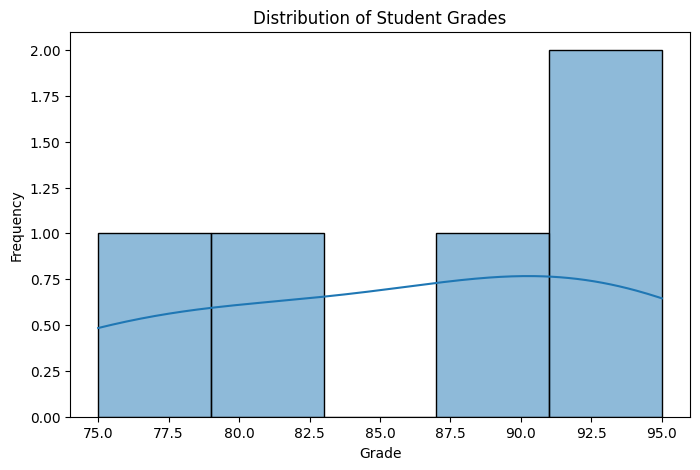

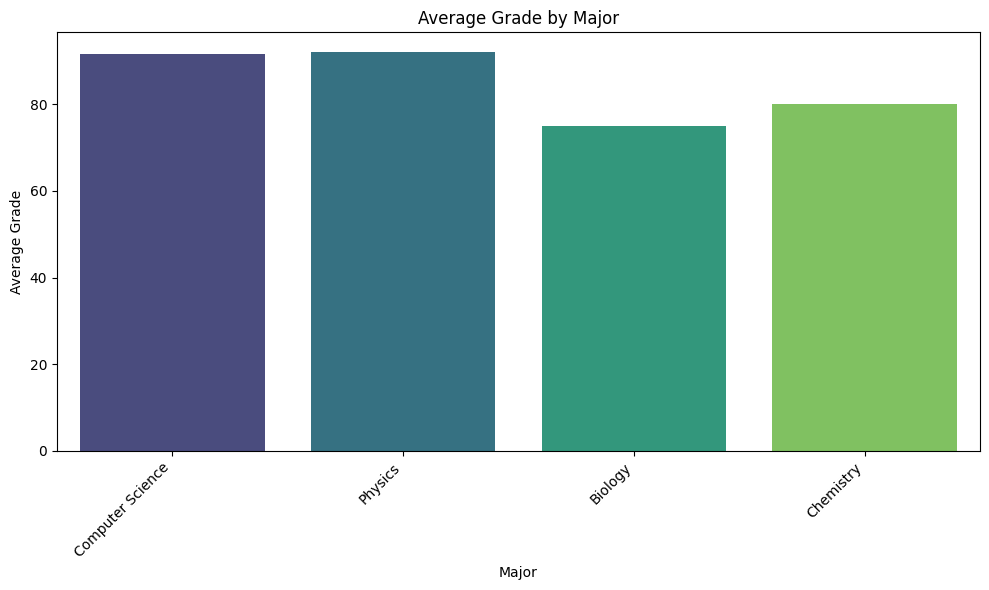

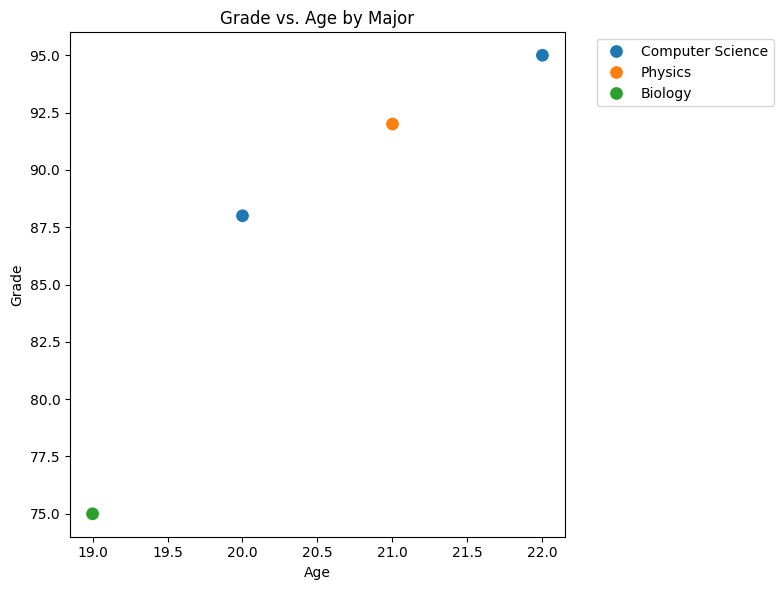

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the df_students DataFrame from the previous section

print("--- Seaborn Visualizations ---")

# 1. Distribution Plot (Histogram + Kde) for Grade
plt.figure(figsize=(8, 5))
sns.histplot(df_students['Grade'], kde=True, bins=5)
plt.title('Distribution of Student Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

# 2. Bar Plot of Average Grade by Major
plt.figure(figsize=(10, 6))
sns.barplot(x='Major', y='Grade', hue='Major', data=df_students, estimator=np.mean, errorbar=None, palette='viridis')
plt.title('Average Grade by Major')
plt.xlabel('Major')
plt.ylabel('Average Grade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Scatter Plot: Grade vs Age
# First, we need to drop rows with NaN in 'Age' for the scatter plot to avoid errors
df_students_clean_age = df_students.dropna(subset=['Age'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Grade', hue='Major', data=df_students_clean_age, s=100)
plt.title('Grade vs. Age by Major')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2.3 Scikit-learn (sklearn)

**Scikit-learn (sklearn)** is a free software machine learning library for the Python programming language. It features various classification, regression, and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

**Key Features and Importance:**

*   **Simple and Efficient Tools:** Provides a consistent API for a wide range of machine learning algorithms.
*   **Accessibility:** Built on NumPy, SciPy, and Matplotlib, making it easy to use for Python developers and data scientists.
*   **Comprehensive Algorithms:** Covers classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
*   **Well-documented:** Extensive documentation with examples helps users understand and implement algorithms.
*   **Production-ready:** Known for its reliability and performance, it's often used in production environments for various tasks.

Scikit-learn is a cornerstone for anyone getting started or performing advanced tasks in machine learning with Python.

--- Scikit-learn (sklearn) Example: Simple Linear Regression ---


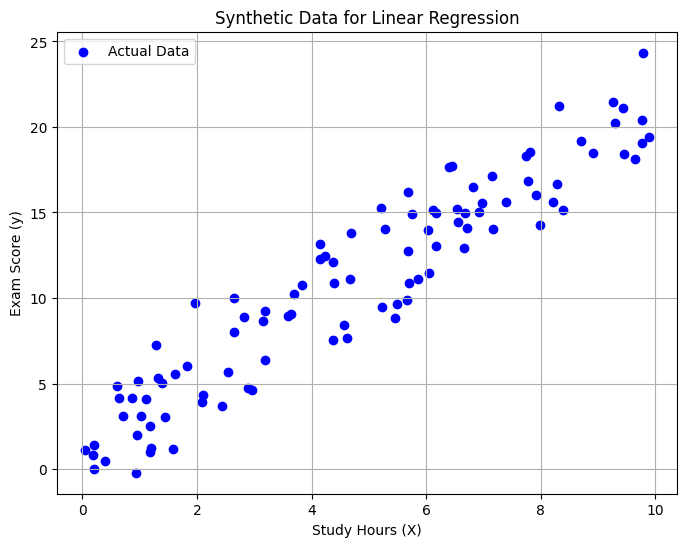


Training data shape: (80, 1), (80, 1)
Testing data shape: (20, 1), (20, 1)

--- Model Training Results ---
Model Intercept: 1.41
Model Coefficient: 2.00

--- Model Evaluation ---
Mean Squared Error (MSE): 3.67
R-squared (R2) Score: 0.85


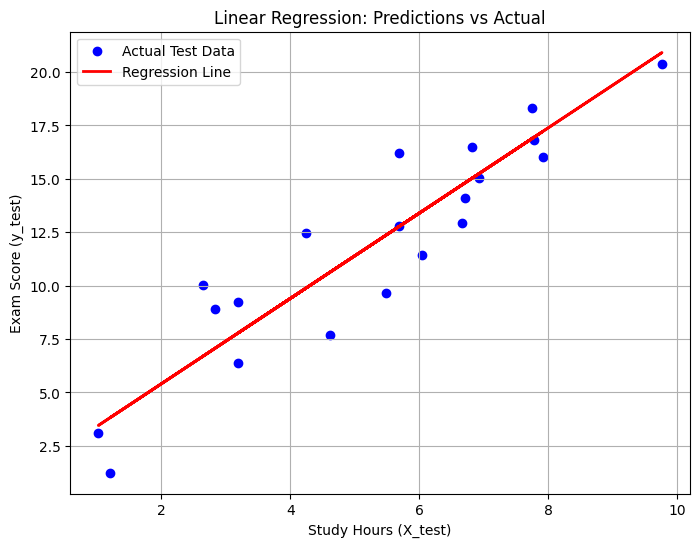

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("--- Scikit-learn (sklearn) Example: Simple Linear Regression ---")

# 1. Generate some synthetic data for demonstration
np.random.seed(0)
X = np.random.rand(100, 1) * 10 # 100 samples, 1 feature (ages between 0 and 10)
y = 2 * X + 1 + np.random.randn(100, 1) * 2 # y = 2X + 1 + noise (e.g., test scores)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('Study Hours (X)')
plt.ylabel('Exam Score (y)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

# 3. Create a Linear Regression model
model = LinearRegression()

# 4. Train the model using the training data
model.fit(X_train, y_train)

print("\n--- Model Training Results ---")
print(f"Model Intercept: {model.intercept_[0]:.2f}")
print(f"Model Coefficient: {model.coef_[0][0]:.2f}")

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# 7. Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Study Hours (X_test)')
plt.ylabel('Exam Score (y_test)')
plt.legend()
plt.grid(True)
plt.show()
